In [85]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [86]:
housetraindf1 = pd.read_csv('train.csv')
housetestdf1 = pd.read_csv('test.csv')
X = housetraindf1.drop('SalePrice', axis=1)
numeric_types = X.dtypes[X.dtypes != "object"].index
X[numeric_types] = X[numeric_types].fillna(X[numeric_types].median())
Xdummy = pd.get_dummies(X)
y = housetraindf1['SalePrice']
y = y.apply(np.log1p,1)
x_train,x_val,y_target,y_val = train_test_split(Xdummy,y,random_state = 0)

In [87]:
############Getting test set ready to predict ####################
numeric_types = housetestdf1.dtypes[housetestdf1.dtypes != "object"].index
housetestdf1[numeric_types] = housetestdf1[numeric_types].fillna(housetestdf1[numeric_types].median())
test = pd.get_dummies(housetestdf1)

In [88]:
## All the algorithms that i was interested in

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

model_name = ["Linear","Ridge","Lasso","Elastic","Bagging","Adaboost","Decision Tree","Gradient Boosting"]
model_l = []
linear = LinearRegression().fit(x_train,y_target).predict(x_val)
ridge = Ridge().fit(x_train,y_target).predict(x_val)
lasso = Lasso().fit(x_train,y_target).predict(x_val)
elastic = ElasticNet().fit(x_train,y_target).predict(x_val)
bagging = BaggingRegressor().fit(x_train,y_target).predict(x_val)
boosting = AdaBoostRegressor().fit(x_train,y_target).predict(x_val)
decision = DecisionTreeRegressor().fit(x_train,y_target).predict(x_val)
Gradient = GradientBoostingRegressor(n_estimators=120,learning_rate=0.09,max_depth=5,max_features=68,random_state=0).fit(x_train,y_target).predict(x_val)
model_l.append(linear)
model_l.append(ridge)
model_l.append(lasso)
model_l.append(elastic)
model_l.append(bagging)
model_l.append(boosting)
model_l.append(decision)
model_l.append(Gradient)

In [89]:

def accuracy_report(name, predicted,original):
    error = np.sqrt((mean_squared_error(predicted,original)))
    print(name, "  Root Mean Square Error ","--", error)
    return error


acc_l= []
for i in range(len(model_l)):
    acc = accuracy_report(model_name[i],model_l[i],y_val)
    acc_l.append(acc)

Linear   Root Mean Square Error  -- 0.22362892453478286
Ridge   Root Mean Square Error  -- 0.19292924365707673
Lasso   Root Mean Square Error  -- 0.24302532581856875
Elastic   Root Mean Square Error  -- 0.2338942223855309
Bagging   Root Mean Square Error  -- 0.1429819048629606
Adaboost   Root Mean Square Error  -- 0.17399249653025242
Decision Tree   Root Mean Square Error  -- 0.20317408098152778
Gradient Boosting   Root Mean Square Error  -- 0.11902689811327628


Text(0.5, 1.0, "Algorithm's Root Mean Squared Error")

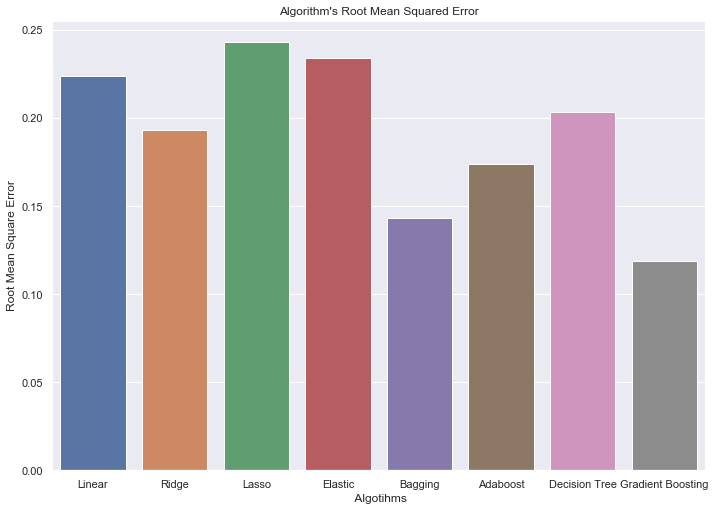

In [90]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
algorithm = sns.barplot(x = model_name,y=acc_l)
algorithm.set(xlabel=" Algotihms",ylabel= "Root Mean Square Error")
algorithm.set_title("Algorithm's Root Mean Squared Error")